In [1]:
import pandas
import numpy
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import time
import sklearn
from sklearn import metrics, grid_search, cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from sklearn.svm import SVC
# fix random seed for reproducibility
plt.rcParams['figure.figsize'] = (15, 6)
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


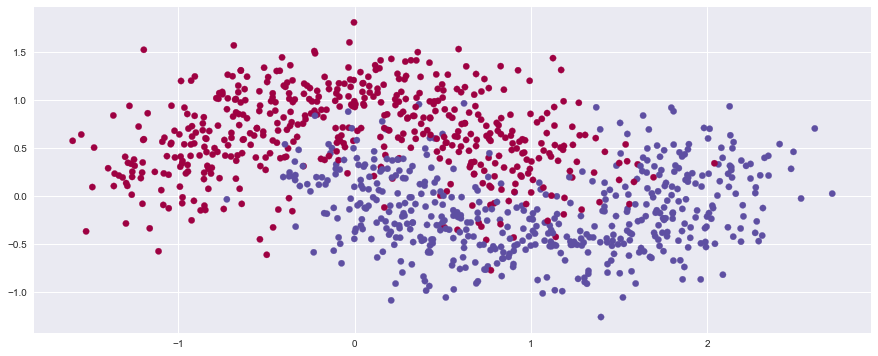

In [2]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(1000, noise=0.30)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Peprocess the data

In [3]:
df = pandas.DataFrame(X,y)

# Prepare the data for classification

In [4]:
dataset = df.values

In [5]:
from sklearn import preprocessing
# for training data
X = dataset.astype(float)
features = preprocessing.scale(X)
target = y

In [6]:
X.shape

(1000, 2)

# Feature Selection

In [7]:
from sklearn.cross_validation import train_test_split
# Extracting 20% validation data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0, random_state=17)

## Preproccing

In [8]:
print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))

Number of training examples 1000
Number of validation examples 0


In [9]:
from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
#X_test = preprocessing.normalize(X_test)
# standardize the data attributes
X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)


# Neural Networks

In [10]:
import seaborn as sns
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
labelsTrain = np_utils.to_categorical(y_train)
model = Sequential()
model.add(Dense(8,
                input_shape=(2,), 
                activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
start_time = time.time()
model.fit(X_train, labelsTrain, verbose=0, batch_size=1, nb_epoch=100)
print("The time for training NN is  %s seconds " % (time.time() - start_time))
loss, accuracy = model.evaluate(X_train, labelsTrain, batch_size=1, verbose=0)
print("Test fraction correct (NN-loss) = {:.2f}".format(loss))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Using Theano backend.


The time for training NN is  34.24704909324646 seconds 
Test fraction correct (NN-loss) = 0.39
Test fraction correct (NN-Accuracy) = 0.85


In [11]:
modelBuckup = model

# Direct Method Pruning weights

Threshold = 0
constant=1
r=0
for k in range(0, 1000, 100):
    col = []
    sample_x = X_train[k+0:k+100]
    sample_y = labelsTrain[k+0:k+100]
    c=0
    for i in range(0, 4): 
        for j in range(0, 4):
            for b in range(0,100):
                loss, accuracy = model.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                 batch_size=1, verbose=0)
                All_weights=model.get_weights()
                temp = All_weights[2][i][j]
                All_weights[2][i][j]=0
                model.set_weights(All_weights)
                loss_New, accuracy_New = model.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                         batch_size=1, verbose=0)
                delta = accuracy_New - accuracy
                reward = max(0,Threshold + delta)/constant
                col.append(reward)
                #print(reward)
                All_weights[2][i][j]= temp
                #print(r,c)
                arry[r][c] = arry[r][c] + reward
                 
                model.set_weights(All_weights)
                #print(delta)
            c = c+1 
    
    r=r+1
    print(r)

In [12]:
arry = np.zeros((10,32))
arryBinar = np.zeros((10,32))

Threshold = 0.0001
constant=1
r=0
for k in range(0, 1000, 100):
    col = []
    sample_x = X_train[k:k+100]
    sample_y = labelsTrain[k:k+100]
    c=0
    for i in range(0, 2): 
        for j in range(0, 4):
            loss, accuracy = model.evaluate(sample_x, sample_y, 
                                                 batch_size=1, verbose=0)
            All_weights=model.get_weights()
            temp = All_weights[0][i][j]
            All_weights[0][i][j]=0
            model.set_weights(All_weights)
            loss_New, accuracy_New = model.evaluate(sample_x, sample_y, 
                                                         batch_size=1, verbose=0)
            delta = accuracy_New - accuracy
            reward = max(0,Threshold + delta)/constant
            col.append(reward)
                #print(reward)
            All_weights[0][i][j]= temp
                #print(r,c)
            arry[r][c] = arry[r][c] + reward
            if reward>0:
                arryBinar[r][c] = 1
            else:
                arryBinar[r][c] = 0
                 
            model.set_weights(All_weights)
                #print(delta)
            c = c+1 
    
    r=r+1
    print(r)

## Prune All weights in the model

In [13]:
Threshold = 0.0001
constant=1
r=0
for k in range(0, 1000, 100):
    sample_x = X_train[k:k+100]
    sample_y = labelsTrain[k:k+100]
    c=0
    for i in range(0, 2): 
        for j in range(0, 8):
            for b in range(0,100):
                loss, accuracy = model.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                 batch_size=1, verbose=0)
                All_weights=model.get_weights()
                temp = All_weights[0][i][j]
                All_weights[0][i][j]=0
                model.set_weights(All_weights)
                loss_New, accuracy_New = model.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                         batch_size=1, verbose=0)
                delta = loss - loss_New
                reward = max(0,Threshold + delta)/constant
                #print(reward)
                All_weights[0][i][j]= temp
                #print(r,c)
                arry[r][c] = arry[r][c] + reward
                if reward>0:
                    R = 1
                else:
                    R = 0
                
                arryBinar[r][c] = arryBinar[r][c] + R
                 
                model.set_weights(All_weights)
                #print(delta)
                
                
                
                temp = All_weights[2][j][i]
                All_weights[2][j][i]=0
                model.set_weights(All_weights)
                loss_New1, accuracy_New1 = model.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                         batch_size=1, verbose=0)
                delta1 = loss - loss_New1
                reward1 = max(0,Threshold + delta1)/constant
                #print(reward)
                All_weights[2][j][i]= temp
                #print(r,c)
                arry[r][c+16] = arry[r][c+16] + reward
                if reward>0:
                    R = 1
                else:
                    R = 0
                
                arryBinar[r][c+16] = arryBinar[r][c+16]+R
                 
                model.set_weights(All_weights)                                
            c = c+1 
    
    r=r+1
    print(r)

1
2
3
4
5
6
7
8
9
10


In [14]:
columns = ['w11','w12','w13','w14','w15','w16','w17','w18',
           'w21','w22','w23','w24','w25','w26','w27','w28',
          'w_11','w_12','w_13','w_14','w_15','w_16','w_17','w_18',
           'w_21','w_22','w_23','w_24','w_25','w_26','w_27','w_28']
indexes = ["sample1", "sample2","sample3","sample4","sample5",
           "sample6","sample7","sample8","sample9","sample10"]

df1 = pandas.DataFrame(arry, index=indexes)
df2 = pandas.DataFrame(arryBinar, index=indexes)
df1.columns = columns
df2.columns = columns

In [15]:
df1 = df1.T
df2 = df2.T

In [16]:
df1

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
w11,0.796911,0.914125,0.956002,0.961828,1.311454,1.029986,1.966574,0.889771,0.410376,0.861353
w12,2.582937,2.405757,3.985711,2.659506,3.780357,3.157987,4.881344,2.460680,1.282188,2.755698
w13,4.631164,4.357768,7.424123,4.838144,6.841282,5.826883,9.008205,4.485184,2.327788,5.099888
w14,0.777602,1.166891,0.359444,0.881373,0.426300,1.043362,0.569465,0.718665,0.917963,0.818130
w15,2.770396,2.711667,6.815985,2.326414,2.355012,4.608149,2.547082,4.232017,0.619897,2.995644
w16,1.208443,1.582652,1.267513,1.549144,1.333371,1.556844,1.364375,1.313567,2.012167,1.114393
w17,1.003722,0.896616,0.655241,0.784737,0.580012,0.910211,0.849386,1.177105,1.233796,1.067749
w18,2.007140,2.407254,1.197665,1.625497,2.207274,1.798367,2.501753,2.185158,2.592238,2.652477
w21,0.065586,0.091818,0.205595,0.109012,0.042725,0.133465,0.202325,0.109194,0.069462,0.165459
w22,0.705334,1.553685,3.175773,2.695580,1.990337,1.579129,2.564576,1.569395,1.010452,2.670135


In [17]:
df1/8

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
w11,0.099614,0.114266,0.119500,0.120228,0.163932,0.128748,0.245822,0.111221,0.051297,0.107669
w12,0.322867,0.300720,0.498214,0.332438,0.472545,0.394748,0.610168,0.307585,0.160273,0.344462
w13,0.578895,0.544721,0.928015,0.604768,0.855160,0.728360,1.126026,0.560648,0.290973,0.637486
w14,0.097200,0.145861,0.044931,0.110172,0.053288,0.130420,0.071183,0.089833,0.114745,0.102266
w15,0.346300,0.338958,0.851998,0.290802,0.294376,0.576019,0.318385,0.529002,0.077487,0.374456
w16,0.151055,0.197831,0.158439,0.193643,0.166671,0.194606,0.170547,0.164196,0.251521,0.139299
w17,0.125465,0.112077,0.081905,0.098092,0.072502,0.113776,0.106173,0.147138,0.154225,0.133469
w18,0.250893,0.300907,0.149708,0.203187,0.275909,0.224796,0.312719,0.273145,0.324030,0.331560
w21,0.008198,0.011477,0.025699,0.013627,0.005341,0.016683,0.025291,0.013649,0.008683,0.020682
w22,0.088167,0.194211,0.396972,0.336948,0.248792,0.197391,0.320572,0.196174,0.126307,0.333767


In [18]:
df2

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
w11,75.0,64.0,75.0,72.0,75.0,68.0,71.0,72.0,59.0,74.0
w12,60.0,50.0,65.0,57.0,60.0,57.0,55.0,51.0,42.0,53.0
w13,60.0,50.0,65.0,57.0,60.0,57.0,54.0,51.0,42.0,53.0
w14,81.0,85.0,88.0,84.0,85.0,89.0,87.0,86.0,99.0,89.0
w15,68.0,75.0,81.0,75.0,72.0,70.0,72.0,67.0,68.0,63.0
w16,88.0,90.0,78.0,84.0,86.0,86.0,83.0,88.0,85.0,85.0
w17,78.0,79.0,80.0,81.0,77.0,82.0,79.0,80.0,98.0,86.0
w18,85.0,90.0,67.0,83.0,84.0,82.0,84.0,89.0,85.0,82.0
w21,70.0,57.0,77.0,67.0,64.0,68.0,64.0,74.0,70.0,77.0
w22,39.0,33.0,43.0,36.0,34.0,42.0,41.0,49.0,44.0,50.0


# Prune the weights in the first layer

In [19]:
arryFirstLayer = np.zeros((10,16))
arryBinarFirstLayer = np.zeros((10,16))



Threshold = 0.0001
constant=1
r=0
for k in range(0, 1000, 100):
    sample_x = X_train[k:k+100]
    sample_y = labelsTrain[k:k+100]
    c=0
    for i in range(0, 2): 
        for j in range(0, 8):
            for b in range(0,100):
                loss, accuracy = model.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                 batch_size=1, verbose=0)
                All_weights=model.get_weights()
                temp = All_weights[0][i][j]
                All_weights[0][i][j]=0
                model.set_weights(All_weights)
                loss_New, accuracy_New = model.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                         batch_size=1, verbose=0)
                delta = loss - loss_New
                reward = max(0,Threshold + delta)/constant
                #print(reward)
                All_weights[0][i][j]= temp
                #print(r,c)
                arryFirstLayer[r][c] = arryFirstLayer[r][c] + reward
                if reward>0:
                    R = 1
                else:
                    R = 0
                
                arryBinarFirstLayer[r][c] = arryBinarFirstLayer[r][c] + R
                 
                model.set_weights(All_weights)
                #print(delta)
                                          
            c = c+1 
    
    r=r+1

In [20]:
columnsFirstLayer = ['w11','w12','w13','w14','w15','w16','w17','w18',
                     'w21','w22','w23','w24','w25','w26','w27','w28']

df1_FL = pandas.DataFrame(arryFirstLayer, index=indexes)
df2_FL = pandas.DataFrame(arryBinarFirstLayer, index=indexes)
df1_FL.columns = columnsFirstLayer
df2_FL.columns = columnsFirstLayer

In [21]:
df1_FL

,w11,w12,w13,w14,w15,w16,w17,w18,w21,w22,w23,w24,w25,w26,w27,w28
sample1,0.796911,2.582937,4.631164,0.777602,2.770396,1.208443,1.003722,2.007140,0.065586,0.705334,1.319390,2.090367,0.252462,1.545462,3.167852,1.255098
sample2,0.914125,2.405757,4.357768,1.166891,2.711667,1.582652,0.896616,2.407254,0.091818,1.553685,2.942291,4.278197,0.222319,1.916770,5.031292,2.246143
sample3,0.956002,3.985711,7.424123,0.359444,6.815985,1.267513,0.655241,1.197665,0.205595,3.175773,6.009647,0.974796,0.256879,1.079692,5.196875,5.261332
sample4,0.961828,2.659506,4.838144,0.881373,2.326414,1.549144,0.784737,1.625497,0.109012,2.695580,5.102767,3.453461,0.250217,1.755590,5.244083,3.652578
sample5,1.311454,3.780357,6.841282,0.426300,2.355012,1.333371,0.580012,2.207274,0.042725,1.990337,3.768697,0.048538,0.096990,2.136149,1.485574,4.272208
sample6,1.029986,3.157987,5.826883,1.043362,4.608149,1.556844,0.910211,1.798367,0.133465,1.579129,2.981201,2.701850,0.216451,1.547390,4.805174,2.362797
sample7,1.966574,4.881344,9.008205,0.569465,2.547082,1.364375,0.849386,2.501753,0.202325,2.564576,4.849350,0.543561,0.134385,1.608889,3.233819,3.849362
sample8,0.889771,2.460680,4.485184,0.718665,4.232017,1.313567,1.177105,2.185158,0.109194,1.569395,2.968557,3.566981,0.350070,1.609332,6.130250,2.856608
sample9,0.410376,1.282188,2.327788,0.917963,0.619897,2.012167,1.233796,2.592238,0.069462,1.010452,1.905410,1.889200,0.096736,1.588881,2.358572,1.287787
sample10,0.861353,2.755698,5.099888,0.818130,2.995644,1.114393,1.067749,2.652477,0.165459,2.670135,5.033657,0.515994,0.230564,0.961901,3.687321,4.272722


In [22]:
df2_FL

,w11,w12,w13,w14,w15,w16,w17,w18,w21,w22,w23,w24,w25,w26,w27,w28
sample1,75.0,60.0,60.0,81.0,68.0,88.0,78.0,85.0,70.0,39.0,39.0,63.0,66.0,94.0,16.0,53.0
sample2,64.0,50.0,50.0,85.0,75.0,90.0,79.0,90.0,57.0,33.0,33.0,69.0,74.0,94.0,16.0,53.0
sample3,75.0,65.0,65.0,88.0,81.0,78.0,80.0,67.0,77.0,43.0,43.0,74.0,71.0,87.0,24.0,53.0
sample4,72.0,57.0,57.0,84.0,75.0,84.0,81.0,83.0,67.0,36.0,36.0,65.0,71.0,91.0,17.0,50.0
sample5,75.0,60.0,60.0,85.0,72.0,86.0,77.0,84.0,64.0,34.0,34.0,66.0,72.0,94.0,13.0,51.0
sample6,68.0,57.0,57.0,89.0,70.0,86.0,82.0,82.0,68.0,42.0,42.0,68.0,67.0,91.0,20.0,53.0
sample7,71.0,55.0,54.0,87.0,72.0,83.0,79.0,84.0,64.0,41.0,41.0,70.0,73.0,89.0,20.0,56.0
sample8,72.0,51.0,51.0,86.0,67.0,88.0,80.0,89.0,74.0,49.0,49.0,76.0,67.0,90.0,23.0,49.0
sample9,59.0,42.0,42.0,99.0,68.0,85.0,98.0,85.0,70.0,44.0,44.0,83.0,67.0,87.0,20.0,39.0
sample10,74.0,53.0,53.0,89.0,63.0,85.0,86.0,82.0,77.0,50.0,50.0,71.0,63.0,87.0,23.0,46.0


# Direct Method Pruning Neurons

In [23]:
N_arry = np.zeros((10,8))
N_arryBinar = np.zeros((10,8))

In [24]:
Threshold = 0
constant=1
r=0
for k in range(0, 1000, 100):
    sample_x = X_train[k:k+100]
    sample_y = labelsTrain[k:k+100]
    for i in range(0, 8): 
        for b in range(0,100):
            loss, accuracy = modelBuckup.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                 batch_size=1, verbose=0)
        # Prune the neuron in the layer
            All_weights=modelBuckup.get_weights()
            temp1 = All_weights[0][0][i]
            temp2 = All_weights[0][1][i]
            temp3 = All_weights[1][i]  # Prune the bias
        # Next Layer
            temp4 = All_weights[2][i][0]
            temp5 = All_weights[2][i][1]
        ######################
            All_weights[0][0][i] = 0
            All_weights[0][1][i] = 0
            All_weights[1][i] = 0  # Prune the bias
        # Next Layer
            All_weights[2][i][0] = 0
            All_weights[2][i][1] = 0
            modelBuckup.set_weights(All_weights)
            loss_New, accuracy_New = modelBuckup.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                         batch_size=1, verbose=0)
            delta = loss - loss_New
            reward = max(0,Threshold + delta)/constant
            print('delta = ', delta)

            All_weights[0][0][i]= temp1  # before
            All_weights[0][1][i]= temp2  # before
            All_weights[1][i]= temp3   # Bais
            All_weights[2][i][0] = temp4 # after
            All_weights[2][i][1] = temp5   # after
        
            #print(r)
            N_arry[r][i] = N_arry[r][i] + reward
            if reward>0:
                R=1
            else:
                R=0
            
            N_arryBinar[r][i] = N_arryBinar[r][i] + R
                 
            modelBuckup.set_weights(All_weights)
                #print(delta)
    
    r=r+1
    #print(r)

delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  -0.0142340362072
delta =  0.0
delta =  0.11385768652
delta =  0.0
delta =  0.0
delta =  -0.0788626372814
delta =  -0.00605420768261
delta =  0.0462482869625
delta =  0.0
delta =  0.0
delta =  -0.0711260735989
delta =  0.0
delta =  0.188118815422
delta =  0.0
delta =  0.146987915039
delta =  0.0
delta =  0.0559927523136
delta =  -0.00202528387308
delta =  0.0
delta =  -0.0546868443489
delta =  -0.0526921451092
delta =  0.0
delta =  -0.0480393469334
delta =  0.0
delta =  5.96046447754e-08
delta =  -0.00226473808289
delta =  0.0
delta =  0.0
delta =  -0.11045217514
delta =  0.0
delta =  -0.0313833802938
delta =  -0.0316893458366
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  0.0
delta =  -0.0310870110989
delta =  0.0
delta =  0.015833646059
delta =  -0.0241875499487
delta =  0.0
delta =  0.0
delta = 

In [25]:
column = ['N1','N2','N3','N4','N5','N6','N7','N8']
indexes = ["sample1", "sample2","sample3","sample4","sample5",
           "sample6","sample7","sample8","sample9","sample10"]

df3 = pandas.DataFrame(N_arry, index=indexes)
df4 = pandas.DataFrame(N_arryBinar, index=indexes)
df3.columns = column
df4.columns = column

In [26]:
df3 = df3.T
df4 = df4.T

In [27]:
df3


,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
N1,0.789411,0.907725,0.948502,0.954628,1.303954,1.023208,1.959474,0.882571,0.404477,0.853953
N2,2.374203,2.664193,6.600520,4.822872,5.862283,3.936261,8.238445,3.415197,1.478889,5.116084
N3,4.162314,4.687110,11.781475,8.637205,10.530963,6.936248,14.565374,6.030811,2.604958,9.098113
N4,2.084067,4.271298,0.967397,3.446961,0.041938,2.695050,0.536561,3.559381,1.880900,0.508894
N5,2.763596,2.704167,6.807885,2.318914,2.347812,4.601149,2.539882,4.225317,0.613097,2.989344
N6,1.371251,1.849277,1.459554,1.595932,1.456463,1.751512,1.558032,1.516560,2.339563,1.210666
N7,3.836772,6.212704,3.913163,5.244758,0.433239,5.207452,1.776195,6.902415,3.255210,2.604042
N8,1.895053,2.232756,3.858254,3.547646,4.882183,1.814582,4.365203,2.275662,2.270042,4.633083


In [28]:
#df3/5

In [29]:
df3['SUM'] = df3.sum(axis=1)

In [30]:
df4

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
N1,12.0,12.0,11.0,13.0,16.0,8.0,18.0,8.0,3.0,6.0
N2,11.0,11.0,11.0,13.0,17.0,8.0,18.0,8.0,4.0,10.0
N3,11.0,11.0,11.0,13.0,17.0,8.0,18.0,8.0,4.0,10.0
N4,6.0,8.0,4.0,4.0,1.0,7.0,2.0,9.0,4.0,4.0
N5,12.0,9.0,22.0,11.0,7.0,16.0,7.0,13.0,6.0,10.0
N6,31.0,40.0,32.0,37.0,34.0,37.0,32.0,34.0,53.0,31.0
N7,15.0,16.0,19.0,14.0,5.0,20.0,14.0,17.0,21.0,12.0
N8,10.0,7.0,10.0,9.0,11.0,9.0,15.0,16.0,10.0,17.0


In [31]:
df4['SUM'] = df4.sum(axis=1)

# Epsilon Greedy

## Pruning the Neurons

In [32]:
Avg_Accumaltive_R_EGN = np.zeros((8,1))
Count_EGN = np.ones((8,1))
import random
epsilon=0.5
for i in range(0, 8): 
            loss, accuracy = modelBuckup.evaluate(X_train[1:10], X_train[1:10], batch_size=1, verbose=0)
        # Prune the neuron in the layer
            All_weights=modelBuckup.get_weights()
            temp1 = All_weights[0][0][i]
            temp2 = All_weights[0][1][i]
            temp3 = All_weights[1][i]  # Prune the bias
        # Next Layer
            temp4 = All_weights[2][i][0]
            temp5 = All_weights[2][i][1]
        ######################
            All_weights[0][0][i] = 0
            All_weights[0][1][i] = 0
            All_weights[1][i] = 0  # Prune the bias
        # Next Layer
            All_weights[2][i][0] = 0
            All_weights[2][i][1] = 0
            modelBuckup.set_weights(All_weights)
            loss_New, accuracy_New = modelBuckup.evaluate(X_train[1:10], X_train[1:10], batch_size=1, verbose=0)
            delta = loss - loss_New
            reward = max(0,Threshold + delta)/constant
            All_weights[0][0][i]= temp1  # before
            All_weights[0][1][i]= temp2  # before
            All_weights[1][i]= temp3   # Bais
            All_weights[2][i][0] = temp4 # after
            All_weights[2][i][1] = temp5   # after
            Avg_Accumaltive_R_EGN[i] = Avg_Accumaltive_R_EGN[i] + reward
            modelBuckup.set_weights(All_weights)


for j in range(0, 1000):
            b = random.randint(0,999) 
            loss, accuracy = modelBuckup.evaluate(X_train[b:b+1], X_train[b:b+1], batch_size=1, verbose=0)
        # Prune the neuron in the layer
            if (epsilon>random.uniform(0, 1)):
                i = np.argmax(Avg_Accumaltive_R_EGN)
                
            else:
                i=random.randint(0,7) 
            Count_EGN[i] = Count_EGN[i] + 1
            All_weights=modelBuckup.get_weights()
            temp1 = All_weights[0][0][i]
            temp2 = All_weights[0][1][i]
            temp3 = All_weights[1][i]  # Prune the bias
        # Next Layer
            temp4 = All_weights[2][i][0]
            temp5 = All_weights[2][i][1]
        ######################
            All_weights[0][0][i] = 0
            All_weights[0][1][i] = 0
            All_weights[1][i] = 0  # Prune the bias
        # Next Layer
            All_weights[2][i][0] = 0
            All_weights[2][i][1] = 0
            modelBuckup.set_weights(All_weights)
            loss_New, accuracy_New = modelBuckup.evaluate(X_train[b:b+1], X_train[b:b+1], batch_size=1, verbose=0)
            delta = loss - loss_New
            reward = max(0,Threshold + delta)/constant
            All_weights[0][0][i]= temp1  # before
            All_weights[0][1][i]= temp2  # before
            All_weights[1][i]= temp3   # Bais
            All_weights[2][i][0] = temp4 # after
            All_weights[2][i][1] = temp5   # after
            val = Count_EGN[i]
            Avg_Accumaltive_R_EGN[i] = (val-1)/val * Avg_Accumaltive_R_EGN[i] + 1/val * reward
            modelBuckup.set_weights(All_weights)

df5 = pandas.DataFrame(Avg_Accumaltive_R_EGN)
df5['Neurons']=column
df5.set_index('Neurons')
df5.reset_index('Neurons')
df5.head(8)

,0,Neurons
0,0.078504,N1
1,0.260869,N2
2,0.558768,N3
3,0.338915,N4
4,0.183015,N5
5,0.000054,N6
6,0.412509,N7
7,0.062414,N8


In [33]:
df3

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,SUM
N1,0.789411,0.907725,0.948502,0.954628,1.303954,1.023208,1.959474,0.882571,0.404477,0.853953,10.027902
N2,2.374203,2.664193,6.600520,4.822872,5.862283,3.936261,8.238445,3.415197,1.478889,5.116084,44.508947
N3,4.162314,4.687110,11.781475,8.637205,10.530963,6.936248,14.565374,6.030811,2.604958,9.098113,79.034569
N4,2.084067,4.271298,0.967397,3.446961,0.041938,2.695050,0.536561,3.559381,1.880900,0.508894,19.992447
N5,2.763596,2.704167,6.807885,2.318914,2.347812,4.601149,2.539882,4.225317,0.613097,2.989344,31.911165
N6,1.371251,1.849277,1.459554,1.595932,1.456463,1.751512,1.558032,1.516560,2.339563,1.210666,16.108810
N7,3.836772,6.212704,3.913163,5.244758,0.433239,5.207452,1.776195,6.902415,3.255210,2.604042,39.385951
N8,1.895053,2.232756,3.858254,3.547646,4.882183,1.814582,4.365203,2.275662,2.270042,4.633083,31.774465


## Compute Spearman’s rank correlation 

In [34]:
df5['rank MAB']=df5[0].rank()
df3['rank Direct'] = df3['SUM'].rank()

In [35]:
df5

,0,Neurons,rank MAB
0,0.078504,N1,3.0
1,0.260869,N2,5.0
2,0.558768,N3,8.0
3,0.338915,N4,6.0
4,0.183015,N5,4.0
5,0.000054,N6,1.0
6,0.412509,N7,7.0
7,0.062414,N8,2.0


In [36]:
df3

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,SUM,rank Direct
N1,0.789411,0.907725,0.948502,0.954628,1.303954,1.023208,1.959474,0.882571,0.404477,0.853953,10.027902,1.0
N2,2.374203,2.664193,6.600520,4.822872,5.862283,3.936261,8.238445,3.415197,1.478889,5.116084,44.508947,7.0
N3,4.162314,4.687110,11.781475,8.637205,10.530963,6.936248,14.565374,6.030811,2.604958,9.098113,79.034569,8.0
N4,2.084067,4.271298,0.967397,3.446961,0.041938,2.695050,0.536561,3.559381,1.880900,0.508894,19.992447,3.0
N5,2.763596,2.704167,6.807885,2.318914,2.347812,4.601149,2.539882,4.225317,0.613097,2.989344,31.911165,5.0
N6,1.371251,1.849277,1.459554,1.595932,1.456463,1.751512,1.558032,1.516560,2.339563,1.210666,16.108810,2.0
N7,3.836772,6.212704,3.913163,5.244758,0.433239,5.207452,1.776195,6.902415,3.255210,2.604042,39.385951,6.0
N8,1.895053,2.232756,3.858254,3.547646,4.882183,1.814582,4.365203,2.275662,2.270042,4.633083,31.774465,4.0


In [65]:
d= df3['rank Direct'].values - df5['rank MAB'].values
d = d*d
S=1-6/(8*(8*8-1)) * d.sum()

In [66]:
S

0.7142857142857143

# SoftMax pruning neurons

## Pruning the neurons

In [ ]:
Avg_Accumaltive_R_EGN = np.zeros((8,1))
Count_EGN = np.ones((8,1))
import random
epsilon=0.5
for i in range(0, 8): 
            loss, accuracy = modelBuckup.evaluate(X_train[1:10], X_train[1:10], batch_size=1, verbose=0)
        # Prune the neuron in the layer
            All_weights=modelBuckup.get_weights()
            temp1 = All_weights[0][0][i]
            temp2 = All_weights[0][1][i]
            temp3 = All_weights[1][i]  # Prune the bias
        # Next Layer
            temp4 = All_weights[2][i][0]
            temp5 = All_weights[2][i][1]
        ######################
            All_weights[0][0][i] = 0
            All_weights[0][1][i] = 0
            All_weights[1][i] = 0  # Prune the bias
        # Next Layer
            All_weights[2][i][0] = 0
            All_weights[2][i][1] = 0
            modelBuckup.set_weights(All_weights)
            loss_New, accuracy_New = modelBuckup.evaluate(X_train[1:10], X_train[1:10], batch_size=1, verbose=0)
            delta = loss - loss_New
            reward = max(0,Threshold + delta)/constant
            All_weights[0][0][i]= temp1  # before
            All_weights[0][1][i]= temp2  # before
            All_weights[1][i]= temp3   # Bais
            All_weights[2][i][0] = temp4 # after
            All_weights[2][i][1] = temp5   # after
            Avg_Accumaltive_R_EGN[i] = Avg_Accumaltive_R_EGN[i] + reward
            modelBuckup.set_weights(All_weights)


for j in range(0, 1000):
            b = random.randint(0,999) 
            loss, accuracy = modelBuckup.evaluate(X_train[b:b+1], X_train[b:b+1], batch_size=1, verbose=0)
        # Prune the neuron in the layer
            if (epsilon>random.uniform(0, 1)):
                i = np.argmax(Avg_Accumaltive_R_EGN)
                
            else:
                i=random.randint(0,7) 
            Count_EGN[i] = Count_EGN[i] + 1
            All_weights=modelBuckup.get_weights()
            temp1 = All_weights[0][0][i]
            temp2 = All_weights[0][1][i]
            temp3 = All_weights[1][i]  # Prune the bias
        # Next Layer
            temp4 = All_weights[2][i][0]
            temp5 = All_weights[2][i][1]
        ######################
            All_weights[0][0][i] = 0
            All_weights[0][1][i] = 0
            All_weights[1][i] = 0  # Prune the bias
        # Next Layer
            All_weights[2][i][0] = 0
            All_weights[2][i][1] = 0
            modelBuckup.set_weights(All_weights)
            loss_New, accuracy_New = modelBuckup.evaluate(X_train[b:b+1], X_train[b:b+1], batch_size=1, verbose=0)
            delta = loss - loss_New
            reward = max(0,Threshold + delta)/constant
            All_weights[0][0][i]= temp1  # before
            All_weights[0][1][i]= temp2  # before
            All_weights[1][i]= temp3   # Bais
            All_weights[2][i][0] = temp4 # after
            All_weights[2][i][1] = temp5   # after
            val = Count_EGN[i]
            Avg_Accumaltive_R_EGN[i] = (val-1)/val * Avg_Accumaltive_R_EGN[i] + 1/val * reward
            modelBuckup.set_weights(All_weights)

df5 = pandas.DataFrame(Avg_Accumaltive_R_EGN)
df5['Neurons']=column
df5.set_index('Neurons')
df5.reset_index('Neurons')
df5.head(8)